# Regression

## Data import

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn as nn
from torch.nn import functional as F

In [2]:
dataset_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/889649d1bc273bf53967cb621a370205715b803b/dataset_day1/insurance.csv'
data = pd.read_csv(dataset_url)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 데이터 label encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#sex
le.fit(data['sex']) 
data['sex'] = le.transform(data['sex'])
# smoker or not
le.fit(data['smoker']) 
data['smoker'] = le.transform(data['smoker'])
#region
le.fit(data['region']) 
data['region'] = le.transform(data['region'])

In [5]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


## Data setup

In [6]:
smoke_data = data[data['smoker'] == 1]

In [7]:
X = torch.from_numpy(smoke_data['bmi'].values)
y = torch.from_numpy(smoke_data['charges'].values)

In [8]:
X = X.reshape(-1, 1).float()
y = y.reshape(-1, 1).float()

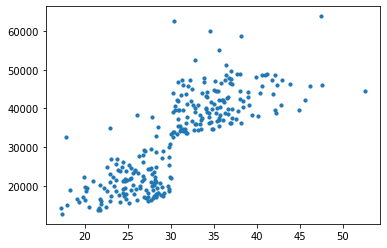

In [9]:
plt.scatter(X, y, s=10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 과제1. 위 데이터를 nn.Module을 활용하여 linear regression하는 코드를 작성하시오
#### 단, epoch=10000, learning rate=0.0001로 하시오

In [11]:
# 모델

class my_LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)   # 한가지 변수를 받아서 한가지 결과를 리턴

    def forward(self, x):
        return self.linear(x)

# Data setup
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model initialize
model = my_LinearRegression()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

nb_epochs = 10000
for epoch in range(nb_epochs + 1):
    # Calculate H(X)
    hypothesis = model(X_train)
    
    # Calculate cost
    cost = F.mse_loss(hypothesis, y_train)
    
    # Parameter gradient descent
    optimizer.zero_grad()
    cost.backward() 
    optimizer.step() 
    
    if epoch % 20 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/10000 W: 204.044, b: 5.985 Cost: 1115789184.000000
Epoch   20/10000 W: 1030.839, b: 29.615 Cost: 55470072.000000
Epoch   40/10000 W: 1041.572, b: 27.645 Cost: 55291096.000000
Epoch   60/10000 W: 1041.782, b: 25.345 Cost: 55288396.000000
Epoch   80/10000 W: 1041.856, b: 23.041 Cost: 55285740.000000
Epoch  100/10000 W: 1041.928, b: 20.738 Cost: 55283092.000000
Epoch  120/10000 W: 1042.000, b: 18.434 Cost: 55280420.000000
Epoch  140/10000 W: 1042.073, b: 16.132 Cost: 55277772.000000
Epoch  160/10000 W: 1042.145, b: 13.829 Cost: 55275116.000000
Epoch  180/10000 W: 1042.217, b: 11.527 Cost: 55272476.000000
Epoch  200/10000 W: 1042.289, b: 9.225 Cost: 55269816.000000
Epoch  220/10000 W: 1042.362, b: 6.924 Cost: 55267168.000000
Epoch  240/10000 W: 1042.434, b: 4.623 Cost: 55264512.000000
Epoch  260/10000 W: 1042.506, b: 2.322 Cost: 55261868.000000
Epoch  280/10000 W: 1042.578, b: 0.022 Cost: 55259216.000000
Epoch  300/10000 W: 1042.650, b: -2.278 Cost: 55256572.000000
Epoch  320/10

In [12]:
hx = (model(X_train)).detach().numpy()

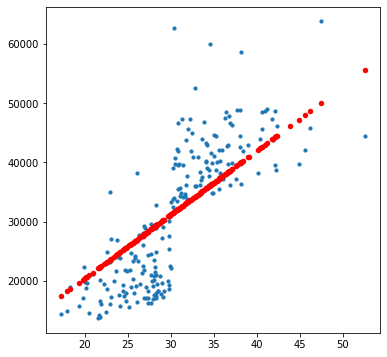

In [13]:
plt.figure(figsize=[6, 6])
plt.scatter(X_train, y_train, s=10)
plt.scatter(X_train, hx, s=20, c='r')